## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('D:\\ALABS\\ML\\ML ONLINE JAN25 _ Class 7 Machine Learning using Python (Online) JAN 2025')

## Loading The Dataset

In [3]:
df = pd.read_csv('train_Loan_Pred - 1739709327697.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [6]:
for i in df.columns:
    print(i,':',df[i].nunique())

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [7]:
df['Loan_Status'].value_counts()/df.shape[0]

Loan_Status
Y    0.687296
N    0.312704
Name: count, dtype: float64

## Handling Null Values

In [8]:
df.shape

(614, 13)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
cat_col = ['Gender', 'Married','Dependents', 'Self_Employed','Loan_Amount_Term', 'Credit_History']
for col in cat_col:
    val = df[col].mode().values[0]
    df[col] = df[col].fillna(val)

In [11]:
value = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(val)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Outliers

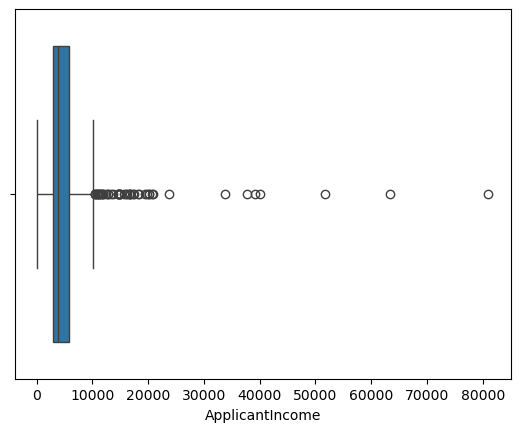

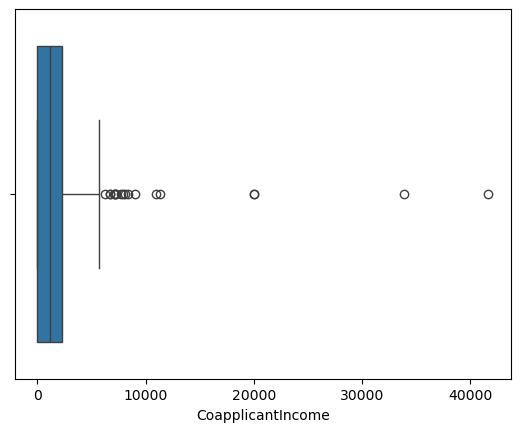

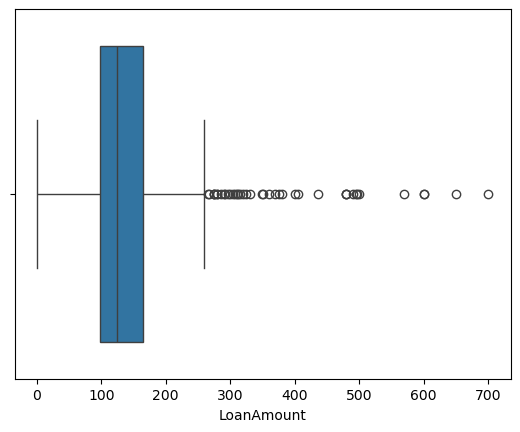

In [13]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.boxplot(df[col],orient='h')
    plt.show()

In [14]:
def get_ll_ul(xx_df,col):
    q1 = xx_df[col].quantile(0.25)
    q3 = xx_df[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    return(ll,ul)

In [15]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    ll,ul = get_ll_ul(df,col)
    total_records = df.shape[0]
    selected_records = df[(df[col]<ll)|(df[col]>ul)].shape[0]
    record_percent = (selected_records/total_records)*100
    print(col)
    print(ll,ul)
    print(record_percent)
    print(selected_records)
    print('______________________________')

ApplicantIncome
-1498.75 10171.25
8.143322475570033
50
______________________________
CoapplicantIncome
-3445.875 5743.125
2.9315960912052117
18
______________________________
LoanAmount
-2.125 264.875
6.677524429967427
41
______________________________


In [16]:
df = df[(df['LoanAmount']>=-2.125)&(df['LoanAmount']<=264.875)]
df.reset_index(drop=True,inplace=True)

In [17]:
df.shape

(573, 13)

## Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
mapping_dict = {}
for col in ['Gender', 'Married','Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])
    print(col)
    print(dict(zip(le.classes_,sorted(df[col].unique()))))
    tmp_dict = dict(zip(le.classes_,sorted(df[col].unique())))
    mapping_dict.update(tmp_dict)

Gender
{'Female': 0, 'Male': 1}
Married
{'No': 0, 'Yes': 1}
Dependents
{'0': 0, '1': 1, '2': 2, '3+': 3}
Education
{'Graduate': 0, 'Not Graduate': 1}
Self_Employed
{'No': 0, 'Yes': 1}
Property_Area
{'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status
{'N': 0, 'Y': 1}


In [21]:
mapping_dict

{'Female': 0,
 'Male': 1,
 'No': 0,
 'Yes': 1,
 '0': 0,
 '1': 1,
 '2': 2,
 '3+': 3,
 'Graduate': 0,
 'Not Graduate': 1,
 'Rural': 0,
 'Semiurban': 1,
 'Urban': 2,
 'N': 0,
 'Y': 1}

In [22]:
encode_df = pd.DataFrame(mapping_dict.items(),columns=['id','value'])
encode_df

,id,value
0,Female,0
1,Male,1
2,No,0
3,Yes,1
4,0,0
5,1,1
6,2,2
7,3+,3
8,Graduate,0
9,Not Graduate,1


In [23]:
encode_df.to_csv('mapping_dict_train_dataset.csv',index=False)

In [24]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,1.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [25]:
df.drop('Loan_ID',inplace=True,axis=1)

## Correlation Check

In [26]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.375391,0.180098,0.051298,0.008485,0.035873,0.144647,0.121751,-0.084473,0.003977,-0.015454,0.020720
Married,0.375391,1.000000,0.342752,0.018311,-0.001509,-0.010384,0.118932,0.155051,-0.100404,0.023116,-0.003964,0.092127
Dependents,0.180098,0.342752,1.000000,0.081040,0.040190,0.027906,-0.048482,0.089173,-0.096469,-0.024022,0.017670,0.011922
Education,0.051298,0.018311,0.081040,1.000000,0.000692,-0.130331,-0.057631,-0.132005,-0.066620,-0.075997,-0.070342,-0.099899
Self_Employed,0.008485,-0.001509,0.040190,0.000692,1.000000,0.224584,-0.020198,0.083551,-0.054266,0.010382,-0.026244,-0.017901
ApplicantIncome,0.035873,-0.010384,0.027906,-0.130331,0.224584,1.000000,-0.162461,0.268782,-0.017091,0.043042,-0.000924,0.011053
CoapplicantIncome,0.144647,0.118932,-0.048482,-0.057631,-0.020198,-0.162461,1.000000,0.167555,-0.002482,0.006817,-0.009439,-0.005103
LoanAmount,0.121751,0.155051,0.089173,-0.132005,0.083551,0.268782,0.167555,1.000000,0.077994,0.002355,-0.099352,0.015293
Loan_Amount_Term,-0.084473,-0.100404,-0.096469,-0.066620,-0.054266,-0.017091,-0.002482,0.077994,1.000000,-0.012008,-0.073093,-0.018222
Credit_History,0.003977,0.023116,-0.024022,-0.075997,0.010382,0.043042,0.006817,0.002355,-0.012008,1.000000,-0.003955,0.558304


## Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
x = df.iloc[:,:-1]
y = df['Loan_Status']

In [29]:
ss = StandardScaler()
x_ft = ss.fit_transform(x)
x_ft = pd.DataFrame(x_ft)
x_ft.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.328911,-0.630154,-2.339179,0.271476,0.414462,1.224522
1,0.47918,0.740708,0.300727,-0.549793,-0.382099,-0.018351,0.012474,0.083806,0.271476,0.414462,-1.326937
2,0.47918,0.740708,-0.718898,-0.549793,2.617120,-0.452565,-0.630154,-1.099068,0.271476,0.414462,1.224522
3,0.47918,0.740708,-0.718898,1.818865,-0.382099,-0.566948,0.374698,-0.068823,0.271476,0.414462,1.224522
4,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.370330,-0.630154,0.331828,0.271476,0.414462,1.224522


In [30]:
import pickle
with open('./Standard_scaler.pkl','wb') as file:
    pickle.dump(ss,file)

## Train and Test data split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x_ft,y,test_size=0.2,random_state=64)

In [33]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((458, 11), (115, 11), (458,), (115,))

## Model Selection

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)

In [36]:
accuracy_score(ytest,pred)

0.8608695652173913

In [37]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70        34
           1       0.84      0.99      0.91        81

    accuracy                           0.86       115
   macro avg       0.90      0.77      0.81       115
weighted avg       0.87      0.86      0.85       115



In [38]:
train_pred = lr.predict(xtrain)
accuracy_score(ytrain,train_pred)

0.8100436681222707

### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [40]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(xtrain,ytrain)
pred = dtc.predict(xtest)

In [41]:
accuracy_score(pred,ytest)

0.8434782608695652

In [42]:
train_pred = dtc.predict(xtrain)
accuracy_score(train_pred,ytrain)

0.8187772925764192

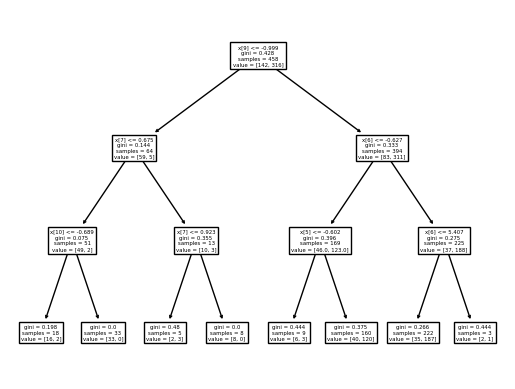

In [43]:
plot_tree(dtc)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

In [51]:
dt1 = DecisionTreeClassifier()
params = {
    'max_depth':[2,3,4,5],
    'min_samples_split':[30,40,50,60]
}

In [52]:
GridSearch = GridSearchCV(dt1,param_grid=params)
GridSearch.fit(xtrain,ytrain)
pred = GridSearch.predict(xtest)
accuracy_score(pred,ytest)

0.8608695652173913

In [53]:
train_pred = GridSearch.predict(xtrain)
accuracy_score(train_pred,ytrain)

0.8078602620087336

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred = rfc.predict(xtest)
accuracy_score(pred,ytest)

0.8173913043478261

In [46]:
train_pred = rfc.predict(xtrain)
accuracy_score(train_pred,ytrain)

1.0

## Best Model

In [47]:
with open('./Best_model.pkl','wb') as file:
    pickle.dump(lr,file)